<h2>Import bibliotek</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h2>Zadanie 1.</h2>

<h4>Funkcja obliczająca średnią geometryczną</h4>

In [2]:
# calculate the geometric average of distance to other points for given xs
def geom_avgs(xs):
    distances = abs(xs[:,np.newaxis] - xs)
    # assign 1 to distances of points from each other to leave product unaffected
    distances[distances == 0] = 1
    return np.prod(distances, axis=0) ** (1/(len(xs)-1))

<h4>Funkcje definiujące zbiory punktów</h4>

In [3]:
# calculate Chebyshev nodes from interval [-1;1]
def chebyshev_node(i, n):
    return -np.cos(np.pi * i / n)

# calculate uniformly distributed points form interval [-1;1]
def uniform_node(i, n):
    return -1 + 2*i/n

<h4>Narysowanie wykresów</h4>

Funkcja rysująca wykresy

In [4]:
# plot function
def plot_nodes_sets(n):
    # chebyshev nodes sets
    chebyshev_nodes_sets = chebyshev_node(np.array(range(n+1)), n)
    # legendre nodes sets
    legendre_nodes_sets = np.polynomial.legendre.leggauss(n+1)[0]
    # uniform nodes sets
    uniform_nodes_sets = uniform_node(np.array(range(n+1)), n)
    # add plots
    plt.plot(chebyshev_nodes_sets, geom_avgs(chebyshev_nodes_sets), label=f"Chebyshev nodes", linestyle='', marker='o')
    plt.plot(legendre_nodes_sets, geom_avgs(legendre_nodes_sets), label=f"Legendre nodes", linestyle='', marker='o')
    plt.plot(uniform_nodes_sets, geom_avgs(uniform_nodes_sets), label=f"Uniform nodes", linestyle='', marker='o')
    # add title and labels
    plt.title(f"Plot for n = {n}")
    plt.xlabel("node x")
    plt.ylabel("geometric avg of distances between nodes")
    # show with legend
    plt.legend()
    plt.show()

Wykres dla $n=10$

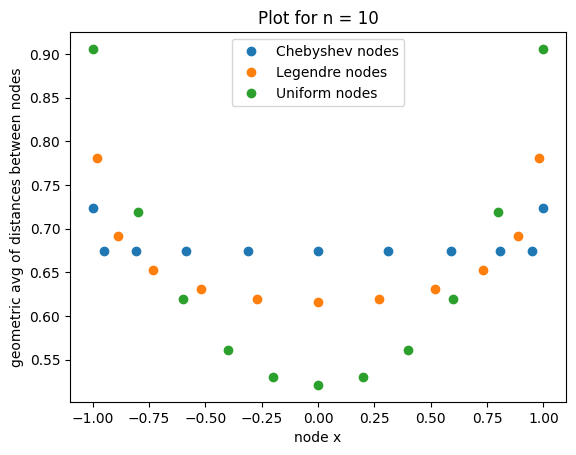

In [5]:
plot_nodes_sets(10)

Wykres dla $n=20$

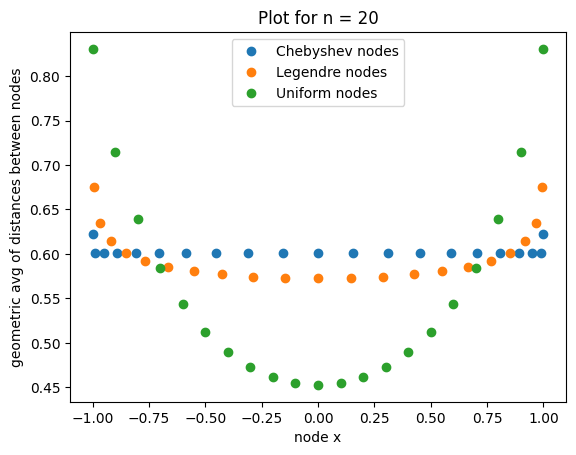

In [6]:
plot_nodes_sets(20)

Wykres dla $n=50$

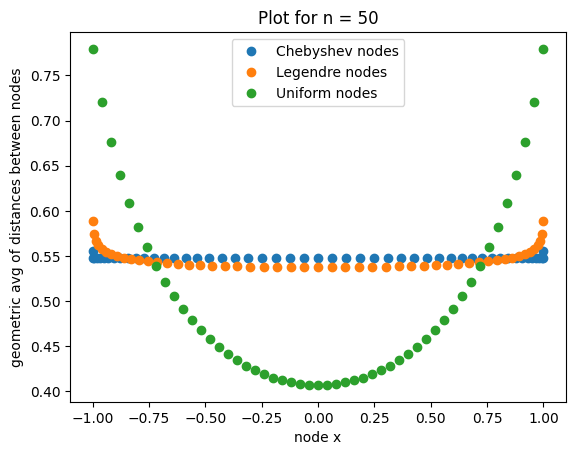

In [7]:
plot_nodes_sets(50)